<a href="https://colab.research.google.com/github/MrKatze07/MLP_Dicoding_StudentPerformance/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Fikri%20Haikal%20Fadzillah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Library for Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, recall_score, precision_score
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [5]:
df = pd.read_csv('next_classification.csv')
df.info()
print("\n5 Baris Pertama Dataset:")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   float64
 1   race/ethnicity               1000 non-null   float64
 2   parental level of education  1000 non-null   float64
 3   lunch                        1000 non-null   float64
 4   test preparation course      1000 non-null   float64
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
 8   Cluster                      1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 70.4 KB

5 Baris Pertama Dataset:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cluster
0,0.0,0.25,0.2,1.0,1.0,0.72,0.662651,0.711111,0
1,0.0,0.50,0.8,1.0,0.0,0.69,0.879518,0.866667,2
2,0.0,0.25,0.6,1.0,1.0,0.90,0.939759,0.922222,0
3,1.0,0.00,0.0,0.0,1.0,0.47,0.481928,0.377778,1
4,1.0,0.50,0.8,1.0,1.0,0.76,0.734940,0.722222,4


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Periksa nilai unik pada target
print(y.unique())

# Jika target adalah nilai kontinu, ubah menjadi kategori
if y.dtype != 'int' and y.dtype != 'object':
    y = pd.cut(y, bins=2, labels=[0, 1])

# Data Splitting: 80% data latih, 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set for X: {X_train.shape}")
print(f"Training set for Y: {y_train.shape}")
print(f"Test set for X : {X_test.shape}" )
print(f"Test set for Y: {y_test.shape}")

## Create Normalization Instance
scaler = MinMaxScaler()

## Normalize all numeric columns
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


[0 2 1 4 3 5]
Training set for X: (800, 8)
Training set for Y: (800,)
Test set for X : (200, 8)
Test set for Y: (200,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print("\nTraining Data Accuracy Results:")
print(f"Random Forest: {rf_model.score(X_train, y_train):.6f}")
print(f"DecisionTree: {dt_model.score(X_train, y_train):.6f}")



Training Data Accuracy Results:
Random Forest: 1.000000
DecisionTree: 1.000000


Tulis narasi atau penjelasan algoritma yang Anda gunakan.\

Dalam hal ini Penggunaan kedua algoritma tersebut  memiliki keunggulan dan kelemahan masing-masing. Random Forest sering lebih unggul dalam hal akurasi, tetapi Decision Tree memberikan kejelasan logika yang lebih baik dan cocok untuk interpretasi yang lebih sederhana atau ketika waktu pelatihan adalah prioritas utama. Dalam konteks data "StudentPerformance," Random Forest biasanya menghasilkan hasil yang lebih baik karena data yang relatif kompleks dan beragam.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Hasil Evaluasi pada Data Uji:
Random Forest - Accuracy: 1.000000, F1-Score: 1.000000, Precision: 1.000000, Recall: 1.000000
DecisionTree - Accuracy: 1.000000, F1-Score: 1.000000, Precision: 1.000000, Recall: 1.000000

Confusion Matrix:
[[33  0  0  0  0  0]
 [ 0 37  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 40  0]
 [ 0  0  0  0  0 26]]
Decision Tree Results:
Accuracy: 1.0
F1 Score: 1.0
Precission: 1.0
Recall: 1.0


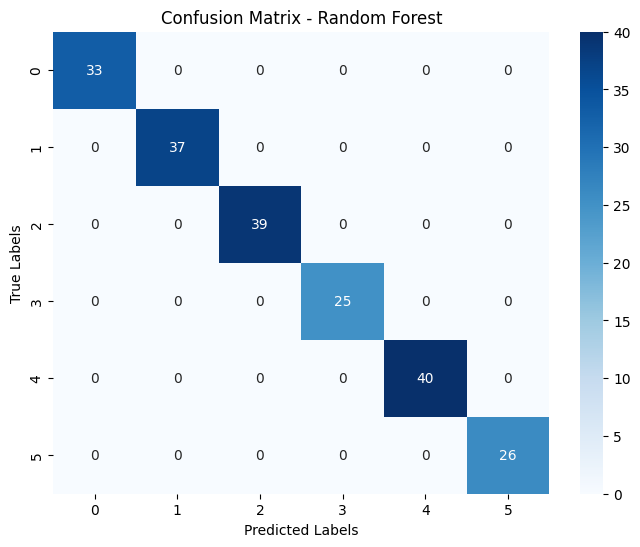


Confusion Matrix:
[[33  0  0  0  0  0]
 [ 0 37  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 40  0]
 [ 0  0  0  0  0 26]]
Decision Tree Results:
Accuracy: 1.0
F1 Score: 1.0
Precission: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        26

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



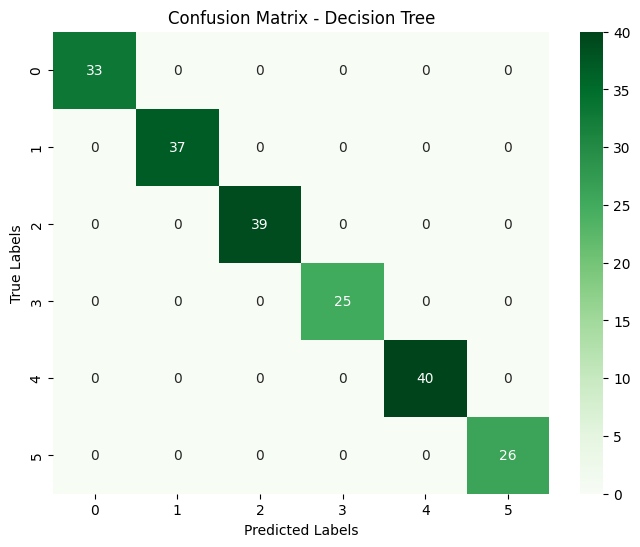

In [8]:
# Lakukan prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Hitung metrik evaluasi untuk Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
prec_rf = precision_score(y_test, y_pred_rf, average='weighted')
rec_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Hitung metrik evaluasi untuk Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
prec_dt = precision_score(y_test, y_pred_dt, average='weighted')
rec_dt = recall_score(y_test, y_pred_dt, average='weighted')

print("\nHasil Evaluasi pada Data Uji:")
print(f"Random Forest - Accuracy: {accuracy_rf:.6f}, F1-Score: {f1_rf:.6f}, Precision: {prec_rf:.6f}, Recall: {rec_rf:.6f}")
print(f"DecisionTree - Accuracy: {accuracy_dt:.6f}, F1-Score: {f1_dt:.6f}, Precision: {prec_dt:.6f}, Recall: {rec_dt:.6f}")

cm_rf= confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm_rf)

# Tampilkan hasil evaluasi Random Forest
print("Decision Tree Results:")
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Precission:", prec_rf)
print("Recall:", rec_rf)

# Visualisasi confusion matrix untuk Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


cm_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("\nConfusion Matrix:")
print(cm_dt)

# Tampilkan hasil evaluasi Decision Tree
print("Decision Tree Results:")
print("Accuracy:", accuracy_dt)
print("F1 Score:", f1_dt)
print("Precission:", prec_dt)
print("Recall:", rec_dt)

print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Visualisasi confusion matrix untuk Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [12]:
rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions={
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42
)
rf_random.fit(X_train, y_train)

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    cv=5,
    scoring='accuracy'
)
dt_grid.fit(X_train, y_train)
print("\nTraining Data Accuracy Results:")
print(f"Random Forest: {rf_random.score(X_train, y_train):.6f}")
print(f"DecisionTree: {dt_grid.score(X_train, y_train):.6f}")



Training Data Accuracy Results:
Random Forest: 1.000000
DecisionTree: 1.000000


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [20]:
best_rf_model = rf_random.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
y_probs_rf = best_rf_model.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf, average='weighted', multi_class='ovr')

print("Best Random Forest Parameters:", rf_random.best_params_)
print("Random Forest Results:")
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("ROC-AUC Score:", roc_auc_rf)

cr_rf = confusion_matrix(y_test, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_test, y_pred_dt)

print("\nConfusion Matrix:")
print(cr_rf)

print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': False}
Random Forest Results:
Accuracy: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0

Confusion Matrix:
[[33  0  0  0  0  0]
 [ 0 37  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 40  0]
 [ 0  0  0  0  0 26]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        26

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [21]:
best_dt_model = dt_grid.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
y_probs_dt = best_dt_model.predict_proba(X_test)
roc_auc_dt = roc_auc_score(y_test, y_probs_dt, average='weighted', multi_class='ovr')

print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Decision Tree Results:")
print("Accuracy:", accuracy_dt)
print("F1 Score:", f1_dt)
print("ROC-AUC Score:", roc_auc_dt)

cr_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("\nConfusion Matrix:")
print(cr_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Results:
Accuracy: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0

Confusion Matrix:
[[33  0  0  0  0  0]
 [ 0 37  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 40  0]
 [ 0  0  0  0  0 26]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        26

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Hasil evaluasi sebelum dan setelah tuning**

Kedua model menunjukkan hasil evaluasi yang optimal dengan metrik Accuracy, F1 Score, dan ROC-AUC Score mencapai nilai sempurna 1.0 setelah tuning.

**Identifikasi**

Dengan hasil evaluasi yang sempurna pada data uji, model kemungkinan mengalami overfitting karena performa yang terlalu ideal dapat mengindikasikan bahwa model mungkin tidak generalisasi dengan baik pada data baru.
Namun, data yang tersedia tampaknya tidak menunjukkan variasi atau kompleksitas yang cukup untuk menguji kemampuan generalisasi model.

**Rekomendasi**

1. Tambahkanlah lebih banyak data dengan variasi yang lebih luas untuk menghindari overfitting. Data tambahan dapat mencakup:
Kasus yang lebih beragam.
Data dengan distribusi target yang lebih seimbang
2. Buat fitur baru atau lakukan seleksi fitur untuk meningkatkan generalisasi.
3. Lakukan percobaaan tuning lebih lanjut menggunakan teknik seperti Bayesian Optimization untuk eksplorasi hyperparameter yang lebih efisien.
